In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
df=pd.read_csv('Corbon emisison.csv')

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,...,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,...,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN
2,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,...,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,...,0.947663,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203,NaN,NaN
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,NaN,NaN


In [5]:
gdp_df=pd.read_csv('GDP_Per _capita.csv')

In [6]:
gdp_df=gdp_df[gdp_df['Country Code'].isin(df['Country Code'])]

In [7]:
gdp_df.fillna(0)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4247.630047,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5396.215864,5332.160475,6492.872012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3902.391701,3989.860174,3948.801128,4048.513876,4105.834468,4261.653789,4188.988532,4308.272753,4042.751224,3857.318464
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,0.000000,0.000000,0.000000
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


## Most recently emitting 

In [8]:
df_2019=df[['Country Name','2019']]

In [9]:
most_emiting_2019=df_2019.sort_values('2019',ascending=False).iloc[:10]

In [10]:
most_emiting_2019

,Country Name,2019
179,Qatar,32.761775
20,Bahrain,22.259581
114,Kuwait,20.861949
7,United Arab Emirates,20.502283
164,Oman,16.518321
28,Brunei Darussalam,15.957155
32,Canada,15.430613
131,Luxembourg,15.306427
11,Australia,15.253618
153,North America,14.753530


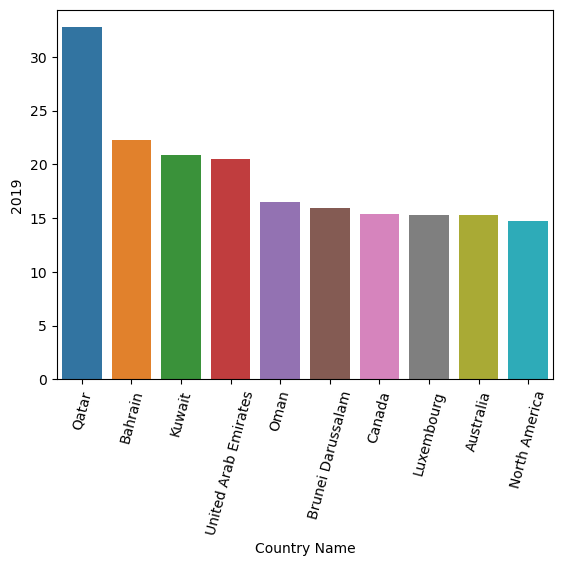

In [11]:
sns.barplot(x='Country Name',y='2019',data=most_emiting_2019)
plt.xticks(rotation=75)
plt.show()

In [12]:
least_emiting_2019=df_2019.sort_values('2019').iloc[:10]

In [13]:
least_emiting_2019

,Country Name,2019
39,"Congo, Dem. Rep.",0.035704
191,Somalia,0.043175
31,Central African Republic,0.046071
14,Burundi,0.060632
151,Malawi,0.076852
155,Niger,0.091710
182,Rwanda,0.103623
189,Sierra Leone,0.111845
222,Uganda,0.136441
205,Chad,0.139519


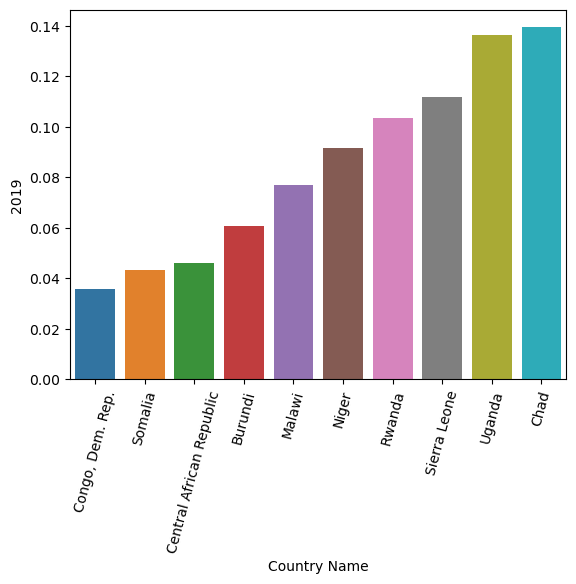

In [14]:
sns.barplot(x='Country Name',y='2019',data=least_emiting_2019)
plt.xticks(rotation=75)
plt.show()

## economic development impact on carbon emissions

In [15]:
temp_df=np.transpose(df.set_index('Country Name'))[3:33].astype(float)

In [16]:
co2=pd.DataFrame(np.transpose(temp_df).mean().reset_index())

In [17]:
temp_gdp_df=np.transpose(gdp_df.set_index('Country Name'))[30:].astype(float)

In [18]:
gdp=pd.DataFrame(np.transpose(temp_gdp_df).mean().reset_index())

In [19]:
x=gdp.merge(co2,on='index').rename(columns={'0_x':'gdp','0_y':'co2'})

In [20]:
x['gdp']=x['gdp'].apply(lambda x:x/3000)

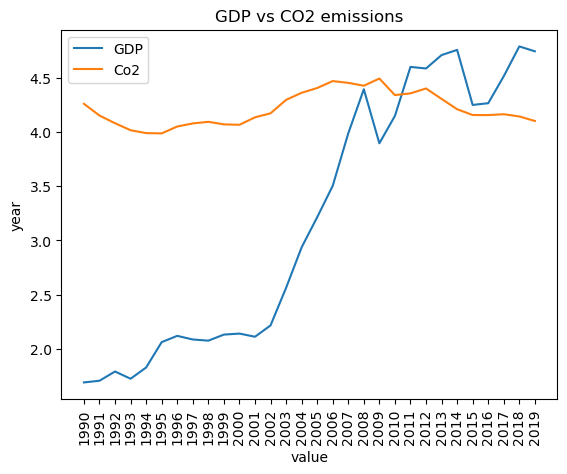

In [21]:
plt.plot(x['index'],x['gdp'],label='GDP')
plt.plot(x['index'], x['co2'],label='Co2')

plt.xlabel("value")
plt.ylabel("year")
plt.xticks(rotation=90)
plt.title('GDP vs CO2 emissions')
plt.legend()
plt.show()

## Which countries have emitted the most carbon till now from 1990

In [22]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,...,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,...,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN
2,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,...,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,...,0.947663,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203,NaN,NaN
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.535122,0.592765,0.588932,0.641916,0.577677,0.686099,...,1.009469,1.000305,1.040856,1.178950,1.459542,1.493041,1.382921,1.415729,NaN,NaN
234,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.496444,0.611693,0.632544,0.570455,0.600521,0.653902,...,0.801193,1.031352,0.988351,0.475163,0.370636,0.333285,0.315682,0.351859,NaN,NaN
235,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,6.210509,5.923352,5.718766,5.796295,5.827404,6.008946,...,8.030478,8.110093,8.184427,7.602659,7.534968,7.691396,7.575040,7.568640,NaN,NaN
236,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.356474,0.365461,0.352970,0.303473,0.252531,0.245275,...,0.273319,0.278307,0.298009,0.305264,0.317276,0.393686,0.433396,0.369958,NaN,NaN


In [35]:
co2=pd.DataFrame(temp_df.mean().reset_index())

In [36]:
co2=co2.sort_values(0,ascending=False)[0:10]

In [38]:
co2['Country Name'].values

array(['Qatar', 'United Arab Emirates', 'Kuwait', 'Bahrain', 'Luxembourg',
       'United States', 'North America', 'Australia', 'Canada',
       'Brunei Darussalam'], dtype=object)

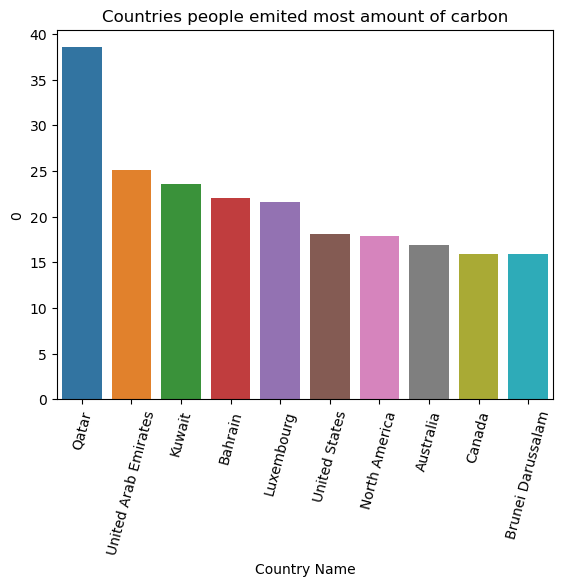

In [33]:
sns.barplot(x='Country Name',y=0,data=co2)
plt.xticks(rotation=75)
plt.title('Countries people emited most amount of carbon')
plt.show()